<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('../datasets/Churn.csv')
data.info()
display(data.head(20))
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Все данные выгружены успешно. Все типы столбцов приведены к верному типу данных, однако можно заметить пропуски в столбце 'Tenure', которые нужно будет заполнить, все остальное в порядке. Получается, предобработка не займет много времени и можно сразу приступить к разбивке выборок.

Заполним пропуски в столбце *Tenure* нулями, так как этот признак означает "сколько лет человек является клиентом банка", а если это значение не указано, значит, клиент только начал сотрудничество и кол-во лет равно 0.

In [3]:
data['Tenure'] = data['Tenure'].fillna(0)

На самом деле *RowNumber*, *CustomerID*, *Surname* - признаки, абсолютно никак не влияющие на значение целевого признака из логических соображений, в первых двух признаках все значения уникальны, а предположить, что фамилия влияет на результат - более чем странно. Удалим их, чтобы не замедляли время обучения модели.

In [4]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Приведем столбца к нормальному виду.

In [5]:
data.columns = data.columns.str.lower()


При обучении модели возникнут трудности, поскольку не все признаки являются численными. Воспользуемся One-hot-encode для кодирования количественных переменный. Также не забудем про дамми-ловушку.

In [6]:
data_ohe = pd.get_dummies(data, drop_first=True)
display(data_ohe)
features = data_ohe.drop('exited', axis=1)
target = data_ohe['exited']

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


Так как тестовой выборки у нас нет, создадим ее сами из существующей.

In [7]:
features_for_split, features_test, target_for_split, target_test = train_test_split(features, target, test_size=0.2, random_state=12345, stratify=target)

features_train, features_valid, target_train, target_valid = train_test_split(features_for_split, target_for_split, test_size=0.25, random_state=12345, stratify=target_for_split)

## Исследование задачи

Заранее узнаем, насколько сбалансированы классы.

In [8]:
class_frequency = data_ohe['exited'].value_counts(normalize=True)
class_frequency

0    0.7963
1    0.2037
Name: exited, dtype: float64

Класс 0 встречается почти в 4 раза чаще, чем класс 1!

Подберем гиперпараметры в цикле. Воспользуемся двумя циклами:

<code>for depth in range(24, 30, 1):
    for trees in range(20, 101, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=trees, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        print(f1_score(target_valid, predicted_valid))
        print('Depth:', depth)
        print('Trees:', trees)
        print()
        if best_f1 < f1_score(target_valid, predicted_valid):
            best_f1 = f1_score(target_valid, predicted_valid)
            best_depth = depth
            best_trees = trees
            best_model = model
</code>

In [9]:
%%time
model = RandomForestClassifier(max_depth=27, n_estimators=40, random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1 score valid:', f1_score(y_true=target_valid, y_pred=predicted_valid))

F1 score valid: 0.5674418604651164
CPU times: total: 344 ms
Wall time: 336 ms


F1 метрика составляет 0.56, но оно и не удивительно, просто в лоб обучили модель, не балансируя классы. Поднять F1 без использования балансирования классов не представляется возможным, это необходимый этап для достижения хорошей качественной модели.

## Борьба с дисбалансом

Первым делом для улучшения нашей модели стандартизируем наши признаки. В разных признаках есть разный разброс значений, поэтому, что наш алгоритм обучения не подумал, что какие-то признаки важнее, стандартизируем!

In [10]:
scaler = StandardScaler()
numerics = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
scaler.fit(features_train[numerics])
features_test[numerics] = scaler.transform(features_test[numerics])
features_train[numerics] = scaler.transform(features_train[numerics])
features_valid[numerics] = scaler.transform(features_valid[numerics])

Поскольку класс 1 встречается в 4 раза реже класса 0, воспользуемся техникой **upsampling**, увеличив выборку.

In [11]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

Получим обновленные признаки.

In [12]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Подберем в цикле гиперпараметры. Обучаем модель уже на увеличенной выборке техникой **upsampling**.



(Закоментил цикл, ибо он работает 5 минут:))

In [13]:
%%time

# best_f1 = 0
# best_trees = 0
# best_depth = 0
# best_model = None

# for depth in range(1, 30, 1):
#     for trees in range(20, 200, 20):
#         model = RandomForestClassifier(random_state=12345, n_estimators=trees, max_depth=depth)
#         model.fit(features_upsampled, target_upsampled)
#         predicted_valid = model.predict(features_valid)
#         print(f1_score(target_valid, predicted_valid))
#         print('Depth:', depth)
#         print('Trees:', trees)
#         print()
#         if best_f1 < f1_score(target_valid, predicted_valid):
#             best_f1 = f1_score(target_valid, predicted_valid)
#             best_depth = depth
#             best_trees = trees
#             best_model = model
best_depth = 12
best_trees = 140
best_model = RandomForestClassifier(random_state=12345, max_depth=best_depth, n_estimators=best_trees)
best_model.fit(features_upsampled, target_upsampled)
predicted_valid = best_model.predict(features_valid)
best_f1 = f1_score(y_true=target_valid, y_pred=predicted_valid)
# Best model with f1 0.6371257485029941, depth 12, trees 140
# CPU times: total: 5min 2s
# Wall time: 5min 3s
print(f'Best model with f1 {best_f1}, depth {best_depth}, trees {best_trees}')

Best model with f1 0.6371257485029941, depth 12, trees 140
CPU times: total: 1.39 s
Wall time: 1.45 s


Теперь F1 результат на валидационной выборке уже составляет 0.63! Отличный результат.

Построим кривую ROC и узнаем как обстоят дела там.

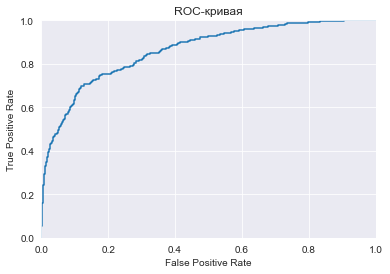

Площадь под кривой ROC составляет: 0.8621441163814045


In [14]:
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure();

plt.plot(fpr, tpr);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.0]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-кривая');
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Площадь под кривой ROC составляет:', auc_roc)

Из графика можно заметить, что наша модель намного лучше случайной, а также площадь в 0.86 говорит нам о том, что наша модель достаточно хороша, однако до единички еще довольно далеко.

## Тестирование модели

Теперь, после того, как наши модели обучены, все проверены на тестовой выборке, а валидационная выборка сделала свою работу, объединим тренировочную и валидационную выборки, и уже обучим модели с нашими подобранными гиперпараметрами на этой увеличенной выборке.

In [15]:
predicted_test = best_model.predict(features_test)

print('F1 score на тестовой выборке составил:', f1_score(y_true=target_test, y_pred=predicted_test))

F1 score на тестовой выборке составил: 0.6135831381733021


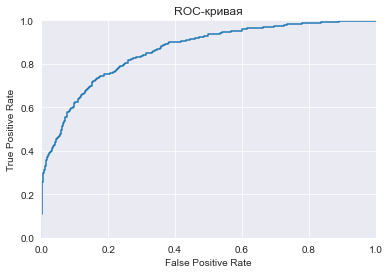

Площадь под кривой ROC составляет: 0.8618726584828278


In [16]:
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure();

plt.plot(fpr, tpr);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.0]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-кривая');
plt.show()
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('Площадь под кривой ROC составляет:', auc_roc)

Снова построили ROC - кривую. Тут результат совсем на капельку лучше.

Теперь, после того, как наши модели обучены, все проверены на тестовой выборке, а валидационная выборка сделала свою работу, объединим тренировочную и валидационную выборки, и уже обучим модели с нашими подобранными гиперпараметрами на этой увеличенной выборке. Вдруг результат будет лучше?

In [17]:
features_full_train = pd.concat([features_upsampled, features_valid])
target_full_train = pd.concat([target_upsampled, target_valid])
model = RandomForestClassifier(random_state=12345, max_depth=12, n_estimators=140)
model.fit(features_full_train, target_full_train)
predicted_full_test = model.predict(features_test)
print('F1 score на тестовой выборке из большой выборки составил:', f1_score(y_true=target_test, y_pred=predicted_full_test))

F1 score на тестовой выборке из большой выборки составил: 0.6250000000000001


Результат не изменился, а жаль.

# Вывод


Проделанная работа включала в себя загрузку и изучение данных, учитывая отсутствие тестовой выборки было необходимо правильно разбить данные для эффективного обучения моделей. Также был встречен признак с пропусками, которые пришлось заполнить. Поскольку в нашем датасете были количественные признаки, пришлось воспользоваться One-hot-encode, чтобы перевести их в численные. Было обучено несколько моделей случайного леса, каждая из которых сопровождалась графиками кривой ROC, подсчетом площади, а также выведены результаты F1 метрики. Перед началом обучения были выкинуты признаки, не влияющие на целевой признак. Был рассмотрен диссбаланс классов целевого признака, и как оказалось, один класс встречался в 4 раза чаще другого! Однако была обучена модель без учета диссбаланса классов, полученная F1 метрика равнялась 0.56, что нельзя назвать хорошим результатом, а уже потом обученая с учетом диссбаланса, применив технику **upsampling**, а также масштабируя все численные признаки, после чего результаты F1 метрики улучшились на валидационной выборке, а затем и на тестовой себя неплохо показала наша модель. Также в надежде на улучшение результата были объеденины тренировочные и тестовые выборки, а затем снова обучена модель, но результат не изменился.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*